### Exercício 01

Escreva um programa em que o limiar seja estimado
automaticamente usando a técnica de Global Thresholding. A saída
deve ser uma imagem binarizada e a entrada deve ser a imagem
fingerPrint.png. Qual a relação que existe entre o limiar e o número
de iterações?

In [1]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_folder = 'imagens/'

In [3]:
def show_img(imgs, titles, rgb=True):
    width = 4 * len(imgs)
    height = 4
    plt.figure(figsize=(width, height))

    for i, (img, title) in enumerate(zip(imgs, titles)):
        if rgb:
            cmap = None
            img = img[:, :, ::-1]
        else:
            cmap = 'gray'

        plt.subplot(1, len(imgs), i+1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis(False)

    plt.show()

In [4]:
def global_thresholding(img, threshold=150, limite=0.5):
    iteracoes = 0

    while True:
        iteracoes += 1
        
        G1 = img[img > threshold]
        G2 = img[img <= threshold]

        if len(G1) == 0:
            G1 = np.array([0])
        if len(G2) == 0:
            G2 = np.array([0])

        m1 = G1.mean()
        m2 = G2.mean()

        threshold_new = (m1 + m2) / 2

        if abs(threshold_new - threshold) < limite:
            break
        else:
            threshold = threshold_new

    new_img = (img > threshold_new)

    return new_img, iteracoes, threshold_new

Para um threshold inicial de 0 foram necessárias 4 iterações para chegar ao fim.
Para um threshold inicial de 50 foram necessárias 4 iterações para chegar ao fim.
Para um threshold inicial de 100 foram necessárias 3 iterações para chegar ao fim.
Para um threshold inicial de 127 foram necessárias 2 iterações para chegar ao fim.
Para um threshold inicial de 150 foram necessárias 3 iterações para chegar ao fim.
Para um threshold inicial de 200 foram necessárias 4 iterações para chegar ao fim.
Para um threshold inicial de 255 foram necessárias 4 iterações para chegar ao fim.


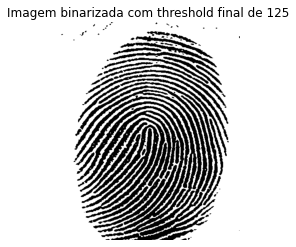

In [5]:
img_path = img_folder + 'fingerPrint.png'

img = imread(img_path, 0)

limite = 0.5

thresholds = [0, 50, 100, 127, 150, 200, 255]

for threshold in thresholds:
    new_img, iteracoes, threshold_new = global_thresholding(img, threshold=threshold, limite=limite)
    print(f'Para um threshold inicial de {threshold} foram necessárias {iteracoes} iterações para chegar ao fim.')

show_img([new_img], [f'Imagem binarizada com threshold final de {int(threshold_new)}'], rgb=False)

**Análise**

Com a execução do algoritmo para vários valores iniciais de limiar foi possível observar que para valores mais distantes do limiar final, há a necessidade de mais iterações para chegar ao valor final do limiar.

### Exercício 02

A imagem abaixo possui círculos e quadrados de vários tamanhos.
Alguns objetos possuem um ou dois buracos dentro deles. Faça um
algoritmo que use operações morfológicas e lógicas para responder
as perguntas abaixo.

(a) Que fração dos pixels da imagem são brancos? Quantos objetos a imagem possui?

(b) Quantos buracos há na imagem? Quantos objetos têm mais de um buraco?

(c) Quantos quadrados e círculos a imagem possui?

(d) Identifique os quadrados que possuem buracos e os círculos que não possuem buracos.